# Distance graph using visualization

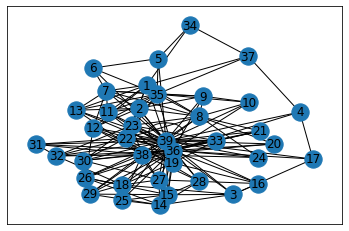

In [101]:
import csv
import networkx as nx

# Graph with weights as distance
G = nx.Graph()

with open('Road_with_traffic.csv') as f:
  file = csv.reader(f)
  for line in file:
    if line[0] != 'Source ':
        G.add_edge(int(line[0]),int(line[1]), cost = int(line[2]))

# G.nodes()
nx.draw_networkx(G)

In [102]:
G.nodes()


NodeView((39, 7, 1, 8, 11, 12, 13, 22, 23, 34, 35, 37, 2, 9, 36, 14, 3, 15, 16, 17, 18, 4, 6, 5, 10, 20, 21, 24, 38, 19, 26, 25, 27, 28, 29, 32, 33, 30, 31))

In [103]:
import matplotlib.pyplot as plt
for path in nx.all_shortest_paths(G,source=32,target=8, weight='cost'):
    print(path)


[32, 23, 8]


[4, 17, 39, 12, 19]


<function matplotlib.pyplot.show(close=None, block=None)>

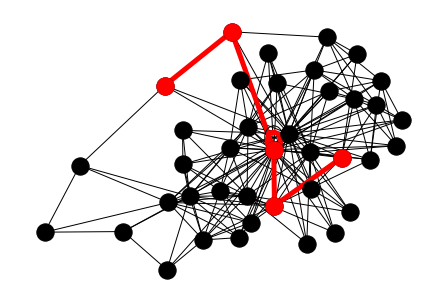

In [4]:
import matplotlib.pyplot as plt
pos=nx.spring_layout(G)
nx.draw(G,pos,node_color='k')
path=nx.shortest_path(G,source=4,target=19, weight='cost')
print(path)
pathedges=list(zip(path,path[1:]))
nx.draw_networkx_nodes(G,pos,nodelist=path,node_color='r')
nx.draw_networkx_edges(G,pos,edgelist=pathedges,edge_color='r',width=5)
# nx.draw(G,with_labels=True)
# plt.axis('equal')
plt.show

In [104]:

#finding the shortest path based on the distance 

path2=nx.shortest_path(G,source=4,target=19, weight='cost')
print(path2)

[4, 17, 39, 12, 19]


# Time measure for path 4 - 19 in distance graph 

In [105]:
#time
total_time=0
for i in range(len(path2)-1):
    print(f"Time to travel from {path2[i]} to {path2[i+1]} is {G_T.edges[path2[i],path2[i+1]]['time']*60:.2f}")
    total_time+=G_T.edges[path2[i],path2[i+1]]['time']
print(f"Total time to travel from {start} to {destination} is {total_time*60:.2f}")

Time to travel from 4 to 17 is 34.00
Time to travel from 17 to 39 is 9.37
Time to travel from 39 to 12 is 6.38
Time to travel from 12 to 19 is 10.20
Total time to travel from 39 to 19 is 59.94


# Distance measure fro path 4-19 in distance graph

In [106]:
#distance
total_dist=0
for i in range(len(path2)-1):
    print(f"Distance to travel from {path2[i]} to {path2[i+1]} is {G.edges[path2[i],path2[i+1]]['cost']:.2f}")
    total_dist+=G.edges[path2[i],path2[i+1]]['cost']
print(f"Total distance to travel from {start} to {destination} is {total_dist:.2f}")

Distance to travel from 4 to 17 is 4.00
Distance to travel from 17 to 39 is 6.00
Distance to travel from 39 to 12 is 2.00
Distance to travel from 12 to 19 is 6.00
Total distance to travel from 39 to 19 is 18.00


# Time graph

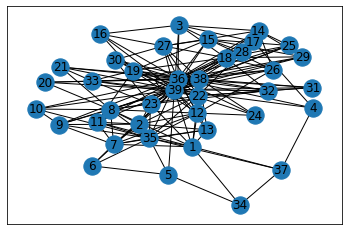

In [107]:
import csv
import networkx as nx

G_T = nx.Graph()

avg_speed=40  #Average speed 

max_traffic=50  #maximum possible traffic

# Graph with weights as Average time 

with open('Road_with_traffic.csv') as f:
  file = csv.reader(f)
  for line in file:
    if line[0] != 'Source ':
        
        # calcualtion of Avegrage time using Traffic and Average speed
        epsilon=1
        alpha=(int(line[3])/(max_traffic+epsilon))
        
        G_T.add_edge(int(line[0]),int(line[1]), time = (int(line[2])/((1-alpha)*avg_speed)))

nx.draw_networkx(G_T)

In [108]:
#nodes that is used to calculations
start=4
destination=19

#Find the shortest path between based on the average time Graph

path1=list(nx.shortest_path(G_T,source=start,target=destination, weight='time'))
print(path1)

[4, 39, 12, 19]


# Time measure for path 4 - 19 in time graph

In [109]:
total_time=0
for i in range(len(path1)-1):
    print(f"Time to travel from {path1[i]} to {path1[i+1]} is {G_T.edges[path1[i],path1[i+1]]['time']*60:.2f}")
    total_time+=G_T.edges[path1[i],path1[i+1]]['time']
print(f"Total time to travel from {start} to {destination} is {total_time*60:.2f}")

Time to travel from 4 to 39 is 27.20
Time to travel from 39 to 12 is 6.38
Time to travel from 12 to 19 is 10.20
Total time to travel from 4 to 19 is 43.77


# Distance measure for path 4 - 19 in time graph

In [110]:
total_dist=0
for i in range(len(path1)-1):
    print(f"Distance to travel from {path1[i]} to {path1[i+1]} is {G.edges[path1[i],path1[i+1]]['cost']:.2f}")
    total_dist+=G.edges[path1[i],path1[i+1]]['cost']
print(f"Total distance to travel from {start} to {destination} is {total_dist:.2f}")

Distance to travel from 4 to 39 is 16.00
Distance to travel from 39 to 12 is 2.00
Distance to travel from 12 to 19 is 6.00
Total distance to travel from 4 to 19 is 24.00


# 2 . Analysing the effects of the fromation of a new Link in the network

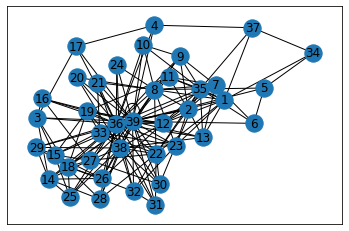

In [112]:
G_tr = nx.Graph()

#Graph with weights as a traffic

with open('Road_with_traffic.csv') as f:
  file = csv.reader(f)
  for line in file:
    if line[0] != 'Source ': 
       
        G_tr.add_edge(int(line[0]),int(line[1]), trafic = (line[3]))

nx.draw_networkx(G_tr)

# Finding the nodes with the highest traffic

In [113]:
max_trf=0
start,end=0,0
for edge in G_tr.edges():
        x,y=edge
        if(max_trf < int(G_tr.edges[x,y]['trafic'])):
            max_trf=int(G_tr.edges[x,y]['trafic'])
            start,end=edge
# print(start,end,max_trf)
#before fromation of  new link
print(f"The traffic between {start} and {end} is {max_trf}")

The traffic between 39 and 19 is 49


# Using the non-neighbouring of 19 to find the distance,traffic and time for the new link

In [115]:
end_non_neighbor=[n for n in nx.non_neighbors(G,end)]
print(list(end_non_neighbor))

[7, 1, 8, 13, 22, 23, 34, 35, 37, 2, 9, 14, 3, 17, 4, 6, 5, 10, 20, 21, 24, 26, 25, 27, 28, 29, 32, 30, 31]


In [117]:
path_length=dict()

for x in end_non_neighbor:
       path_length[x]={end : [n for n in nx.shortest_path(G, source=end, target=x)]}

In [118]:
path_length

{7: {19: [19, 11, 7]},
 1: {19: [19, 11, 1]},
 8: {19: [19, 38, 8]},
 13: {19: [19, 36, 13]},
 22: {19: [19, 33, 22]},
 23: {19: [19, 33, 23]},
 34: {19: [19, 11, 1, 34]},
 35: {19: [19, 11, 35]},
 37: {19: [19, 11, 1, 37]},
 2: {19: [19, 11, 2]},
 9: {19: [19, 36, 9]},
 14: {19: [19, 36, 14]},
 3: {19: [19, 15, 3]},
 17: {19: [19, 36, 17]},
 4: {19: [19, 36, 4]},
 6: {19: [19, 39, 6]},
 5: {19: [19, 39, 5]},
 10: {19: [19, 36, 10]},
 20: {19: [19, 36, 20]},
 21: {19: [19, 33, 21]},
 24: {19: [19, 36, 24]},
 26: {19: [19, 12, 26]},
 25: {19: [19, 15, 25]},
 27: {19: [19, 15, 27]},
 28: {19: [19, 15, 28]},
 29: {19: [19, 15, 29]},
 32: {19: [19, 18, 32]},
 30: {19: [19, 36, 30]},
 31: {19: [19, 36, 31]}}

# Traffic calculation for new link

In [119]:
#traffic calculation for the new edge

def traffic_calc(x,y,flg=False):
    new_trf=0
    dist_per=0.05
        
    #calculation for node1
    list1=list(nx.neighbors(G,x))
    for i in list1:
        new_trf+=int(G_tr.edges[x,i]['trafic'])*dist_per
        if flg:
            G_tr.edges[x,i]['trafic']=int(G_tr.edges[x,i]['trafic'])-int(G_tr.edges[x,i]['trafic'])*dist_per
    
    #calculation for node2 
    list2=list(nx.neighbors(G,y))
    for i in list2:
        new_trf+=int(G_tr.edges[y,i]['trafic'])*dist_per
        if flg:
            G_tr.edges[y,i]['trafic']=int(G_tr.edges[y,i]['trafic'])-int(G_tr.edges[y,i]['trafic'])*dist_per
        
    return new_trf

# Distance calculation for new link

In [120]:
#calculate the distance in the new edge

import math
def dist_calc(x,y):
    new_dist=0
    dist=0
    list1=path_length[x][y]
    
    for i in range(len(list1)-1):
        dist+=G.edges[list1[i],list1[i+1]]['cost']
        new_dist=G.edges[list1[i],list1[i+1]]['cost'] * G.edges[list1[i],list1[i+1]]['cost']
        
    new_dist=math.sqrt(new_dist)
    return [dist,new_dist]

# Time calculation for new link

In [121]:

def Time_distance_calc(x,y):
    res=dist_calc(37,19)
    dist=res[1]

    val=traffic_calc(37,19)

    alpha=(val)/(max_traffic+epsilon)
    time=dist/((1-alpha)*avg_speed)

    #print("time=",time*60)
    #print("distance=",res[1])
    
    return (time*60,res[1])

# Function for displaying the calculated values

In [122]:
def find_dist(path,flg=False):
    total_dist=0
    for i in range(len(path)-1):
        if flg:
            print(f"Distance to travel from {path[i]} to {path[i+1]} is {G.edges[path[i],path[i+1]]['cost']:.2f}")
        total_dist+=G.edges[path[i],path[i+1]]['cost']
    if flg:
        print(f"Total distance to travel from {path[0]} to {path[len(path)-1]} is {total_dist:.2f}")
    return total_dist

In [123]:
def find_time(path,flg=False):
    total_time=0
    for i in range(len(path)-1):
        if flg:
            print(f"Time to travel from {path[i]} to {path[i+1]} is {G_T.edges[path[i],path[i+1]]['time']*60:.2f}")
        total_time+=G_T.edges[path[i],path[i+1]]['time']
    if flg:
        print(f"Total time to travel from {path[0]} to {path[len(path)-1]} is {total_time*60:.2f}")
    return total_time*60


# Calling the above functions

In [124]:
nodes=list(path_length.keys())

node1=0
node2=0
time_val=0
dist_val=0

y=19
max_time=0

for x in nodes:
    time,dist=Time_distance_calc(x,y)
    if time>max_time:
        node1=x
        node2=y
        time_val=time
        dist_val=dist
        
print(f"New link between {node1} and {node2} with time {time_val:.2f} and distance {dist_val:.2f}")

New link between 31 and 19 with time 25.85 and distance 11.00


# Travel time before the formation of the new link

In [90]:
find_time(path_length[31][19],True)

Time to travel from 19 to 36 is 40.50
Time to travel from 36 to 31 is 153.00
Total time to travel from 19 to 31 is 193.50


193.50000000000003

# Updating the traffic after the formation of the new link

In [125]:
#Update Traffic in the graph
traffic_calc(31,19,True)

19.800000000000004

# constructing a updated graph

[39, 7, 1, 8, 11, 12, 13, 22, 23, 34, 35, 37, 2, 9, 36, 14, 3, 15, 16, 17, 18, 4, 6, 5, 10, 20, 21, 24, 38, 19, 26, 25, 27, 28, 29, 32, 33, 30, 31]


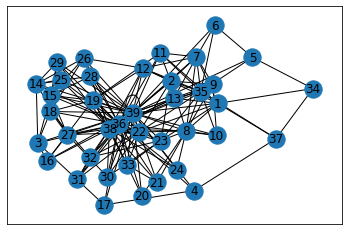

In [126]:
#constructing a updated graph
edges_tr=G_tr.edges()
G_up = nx.Graph()


for ed in edges_tr:
    x,y=ed
    alpha=(int(G_tr.edges[x,y]['trafic']))/(max_traffic+epsilon)
    time=int(G.edges[x,y]['cost'])/((1-alpha)*avg_speed)
    G_up.add_edge(x,y, new_time = time)
print(G.nodes())
nx.draw_networkx(G)

# Travel Time between 19 and 31 through 36 after formation of direct link between 19 and 31 

In [93]:
def find_updated_time(path):
    total_time=0
    for i in range(len(path)-1):
        print(f"Time to travel from {path[i]} to {path[i+1]} is {G_up.edges[path[i],path[i+1]]['new_time']*60:.2f}")
        total_time+=G_up.edges[path[i],path[i+1]]['new_time']
    print(f"Total time to travel from {path[0]} to {path[len(path)-1]} is {total_time*60:.2f}")
    return total_time

In [94]:
path=path_length[31][19]
find_updated_time(path)

Time to travel from 19 to 36 is 39.34
Time to travel from 36 to 31 is 107.10
Total time to travel from 19 to 31 is 146.44


2.440714285714286

# Traffic of the link between node 19 and its neighbouring node 39 is also reduced

In [127]:
G_tr.edges[39,19]['trafic']
print(f"The traffic between 19 and 39 is {G_tr.edges[39,19]['trafic']}")

The traffic between 19 and 39 is 46.55
